In [1]:
import numpy as np
import pandas as pd
import torch
from torch import nn

from sklearn import datasets
from sklearn import model_selection

import itertools

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
class MyDataset:
    def __init__(self, X, y):
        assert len(X) == len(y)
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return {
            'x': torch.tensor(self.X[idx, :]),
            'y': torch.tensor(self.y[idx]),
        }

In [3]:
X, y = datasets.make_classification(n_samples=1000, n_features=7, random_state=1)

/home/oren/projects/humans_thoughts/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


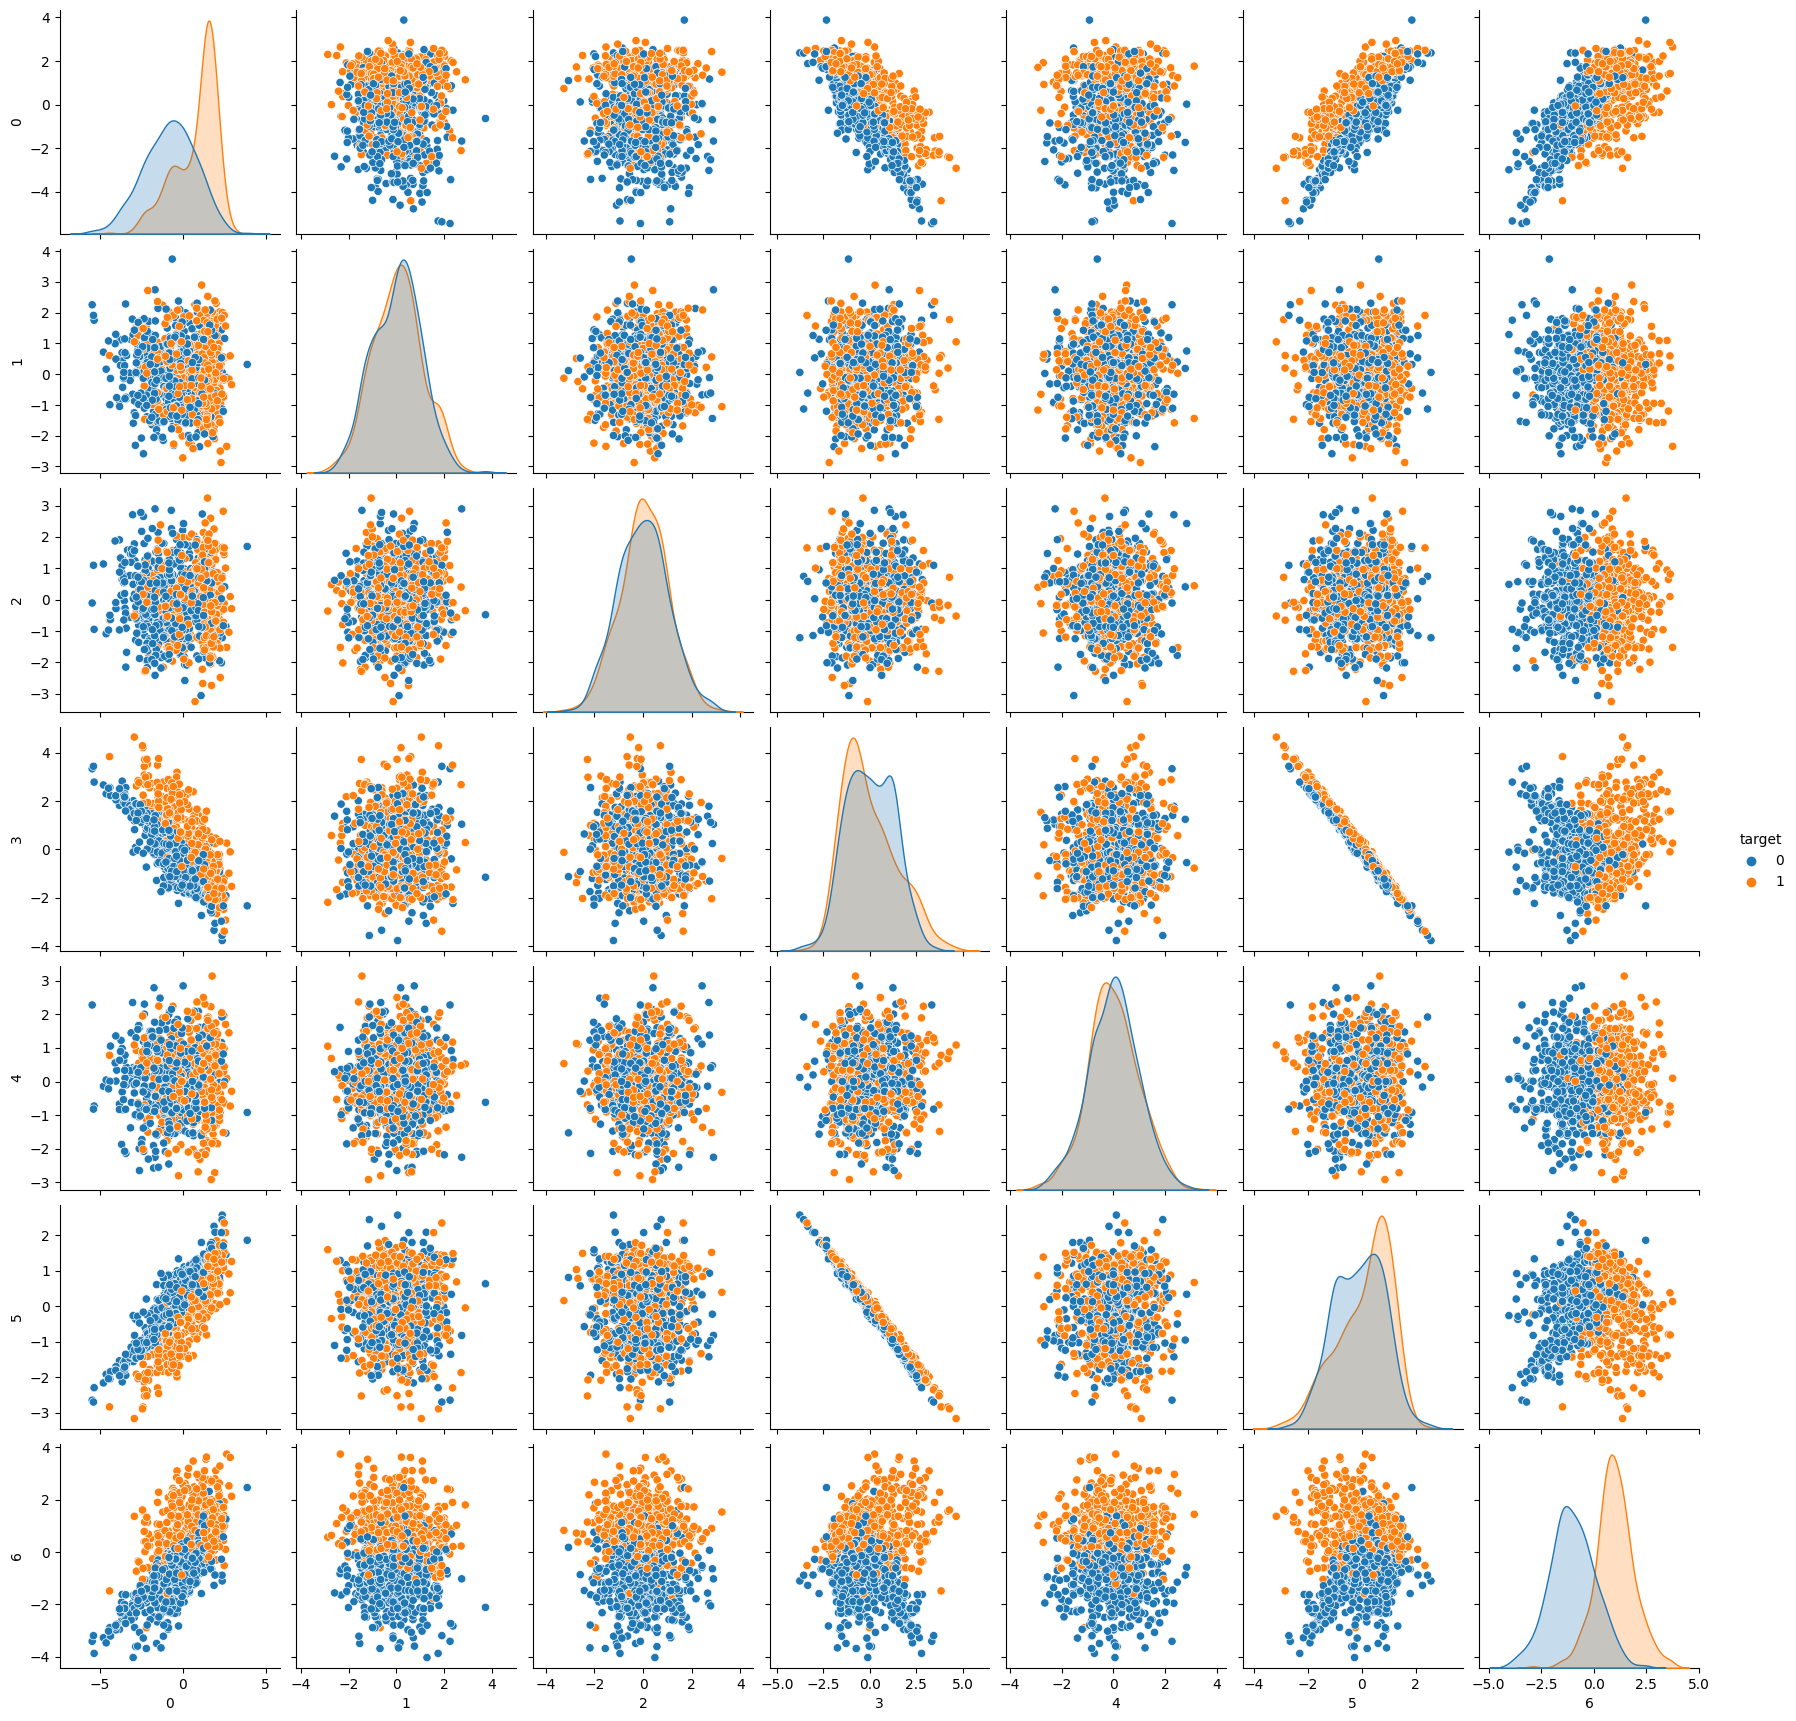

In [20]:
df = (
    pd.DataFrame(X)
    .assign(
        target=y
    )
)

sns.pairplot(data=df, hue='target')
# pd.plotting.scatter_matrix(df.drop('target', axis=1), c=y, figsize=(12, 8))
plt.show()

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
train_dataset = MyDataset(X=X_train, y=y_train)
valid_dataset = MyDataset(X=X_test, y=y_test)

In [7]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=40)

In [9]:
for data in itertools.islice(train_dataloader, 1):
    print(data.keys())
    print(data['x'][:5, :])
    print(data['y'][:5])
    print(data['x'].shape, data['y'].shape)

dict_keys(['x', 'y'])
tensor([[ 0.7734,  0.8674,  1.1751, -1.2730,  0.1261,  0.8664, -0.4127],
        [-0.0622, -1.1693,  1.4060, -0.7104,  0.0044,  0.4286, -0.8757],
        [ 1.5601,  0.1651,  1.1775, -1.9878,  0.6848,  1.3921, -0.1836],
        [-1.3292,  0.6174, -1.3311,  2.1156, -0.4102, -1.4447,  0.6282],
        [-2.6077,  0.6306,  0.5737,  0.3015,  1.5976, -0.4749, -3.0716]],
       dtype=torch.float64)
tensor([1, 1, 1, 1, 0])
torch.Size([40, 7]) torch.Size([40])
